# IPCV Experiment-6

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("hogwarts.jpg", cv2.IMREAD_GRAYSCALE)
# cv2.imshow("Displayed Image",image)

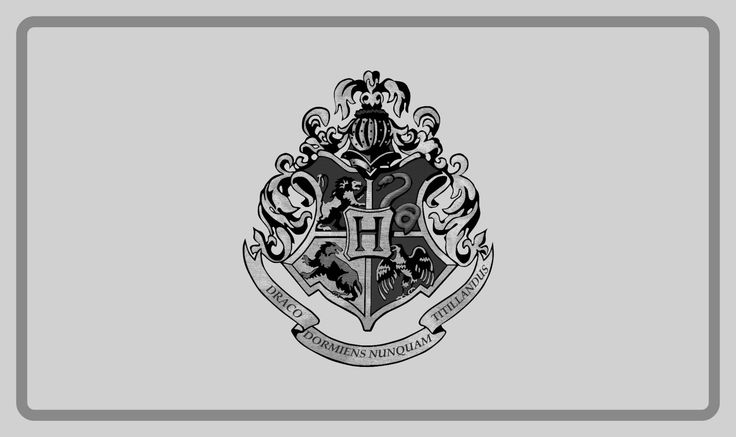

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
print("Size of image: ",image.shape)
print("Datatype of image: ",image.dtype)
print("Channels of image: ",image.ndim)
print("Total number of pixels (Size of image):",image.size)

Size of image:  (437, 736)
Datatype of image:  uint8
Channels of image:  2
Total number of pixels (Size of image): 321632


In [ ]:
# Multiply Image by (-1)^(x+y)
modified_img = np.zeros(image.shape, dtype=np.float64)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        modified_img[i][j] = float(image[i][j]) * ((-1)**(i+j))

In [ ]:
F = np.fft.fft2(modified_img)

#### Ideal Low Pass Filter

In [ ]:
def ilpf(shape, cutoff):
    rows, cols = shape
    M, N = rows // 2, cols // 2
    H = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - M)**2 + (j - N)**2)
            if distance <= cutoff:
                H[i, j] = 1
            else:
                H[i, j] = 0
    return H

In [ ]:
cutoff = 40
H = ilpf(image.shape, cutoff)
G = F * H

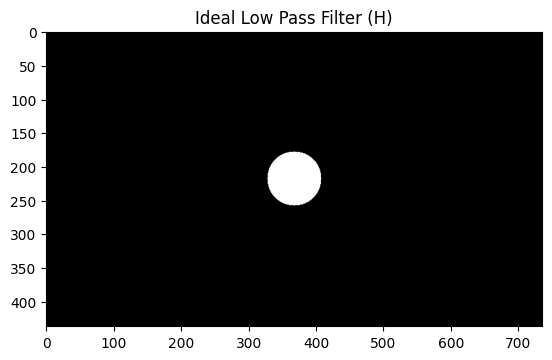

In [ ]:
plt.imshow(H, cmap='gray')
plt.title("Ideal Low Pass Filter (H)")
plt.show()

In [ ]:
G_shifted = np.fft.fftshift(G)

In [ ]:
g = np.fft.ifft2(G_shifted)

In [ ]:
g = np.abs(g)

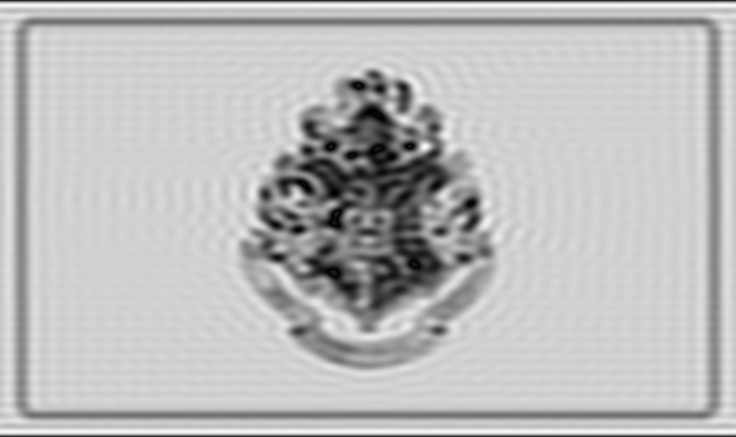

In [ ]:
cv2_imshow(g.astype(np.uint8))

#### Butterworth Filter

In [ ]:
def butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    M, N = rows // 2, cols // 2
    H = np.zeros((rows, cols), np.float64)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - M)**2 + (j - N)**2)
            H[i, j] = 1 / (1 + (distance / cutoff)**(2 * order))
    return H

In [ ]:
cutoff = 50
order = 2
H_butterworth = butterworth_filter(image.shape, cutoff, order)
G_butterworth = F * H_butterworth

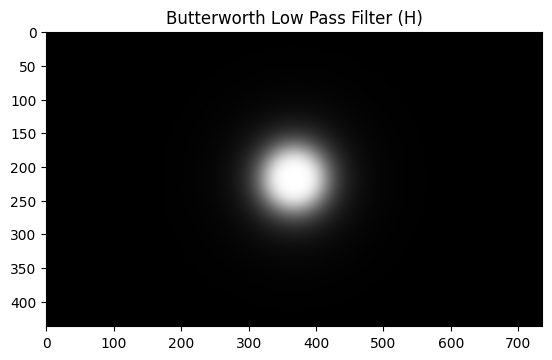

In [ ]:
plt.imshow(H_butterworth, cmap='gray')
plt.title("Butterworth Low Pass Filter (H)")
plt.show()

In [ ]:
G_butterworth_shifted = np.fft.fftshift(G_butterworth)

In [ ]:
g_butterworth = np.fft.ifft2(G_butterworth_shifted)

In [ ]:
g_butterworth = np.abs(g_butterworth)

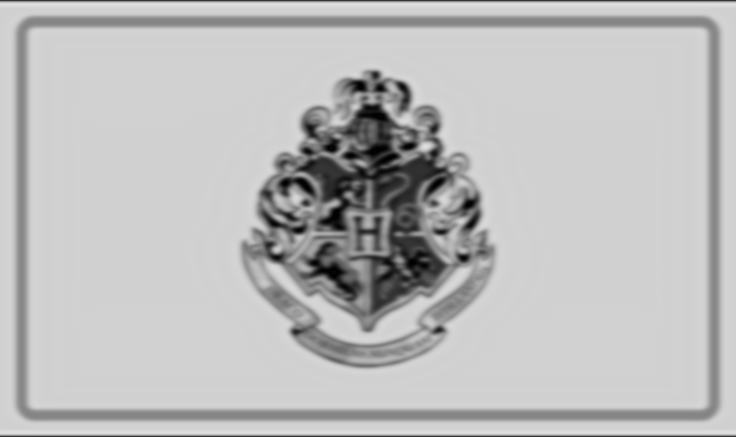

In [ ]:
cv2_imshow(g_butterworth.astype(np.uint8))

#### Gaussian Filter

In [ ]:
def gaussian_filter(shape, cutoff_frequency):
    rows, cols = shape
    M, N = rows // 2, cols // 2
    H = np.zeros((rows, cols), np.float64)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - M)**2 + (j - N)**2)
            H[i, j] = np.exp(-(distance**2) / (2 * (cutoff_frequency**2)))
    return H

In [ ]:
cutoff = 100
H_gaussian = butterworth_filter(image.shape, cutoff, order)
G_gaussian = F * H_gaussian

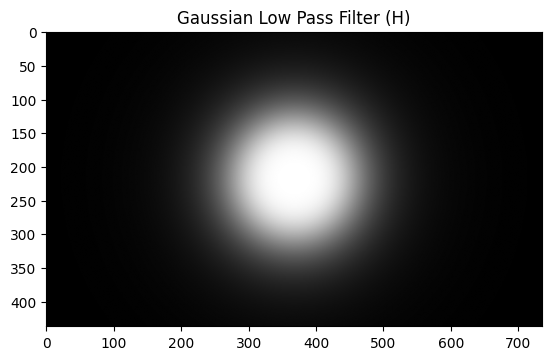

In [ ]:
plt.imshow(H_gaussian, cmap='gray')
plt.title("Gaussian Low Pass Filter (H)")
plt.show()

In [ ]:
G_gaussian_shifted = np.fft.fftshift(G_gaussian)

In [ ]:
g_gaussian = np.fft.ifft2(G_gaussian_shifted)

In [ ]:
g_gaussian = np.abs(g_gaussian)

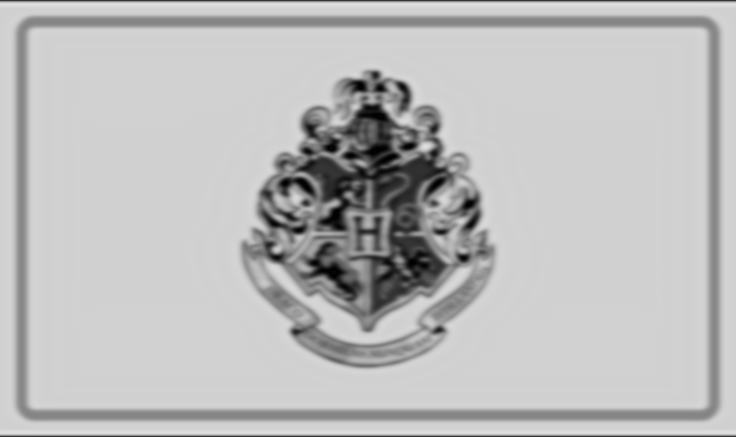

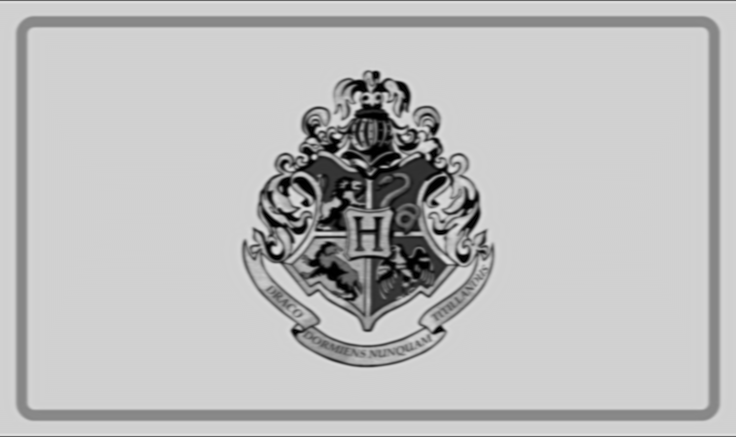

In [ ]:
cv2_imshow(g_butterworth.astype(np.uint8))
cv2_imshow(g_gaussian.astype(np.uint8))

#### Ideal High Pass Filter

In [ ]:
def ihpf(shape, cutoff):
    rows, cols = shape
    M, N = rows // 2, cols // 2
    H = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - M)**2 + (j - N)**2)
            if distance > cutoff:
                H[i, j] = 1
            else:
                H[i, j] = 0
    return H

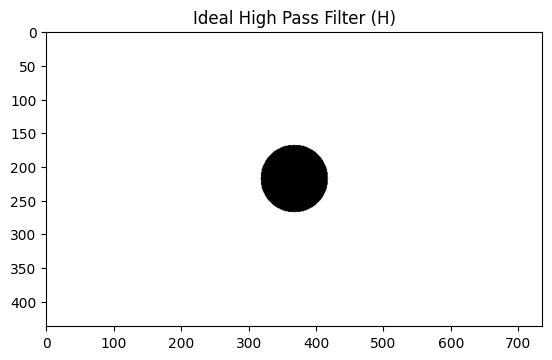

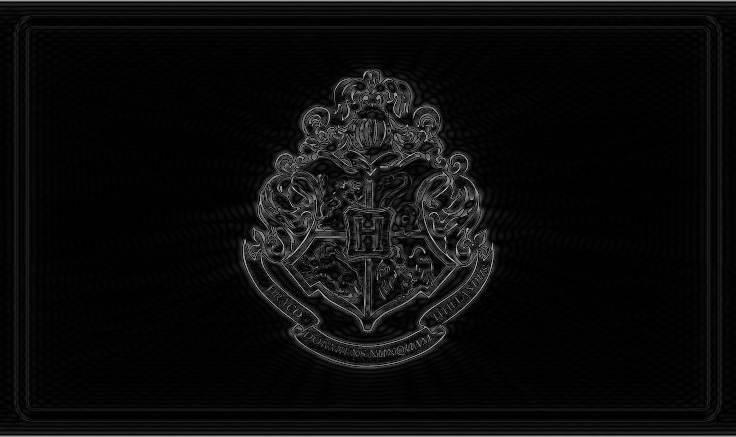

In [ ]:
cutoff = 50
H_ihpf = ihpf(image.shape, cutoff)
G_ihpf = F * H_ihpf

plt.imshow(H_ihpf, cmap='gray')
plt.title("Ideal High Pass Filter (H)")
plt.show()

G_shifted_ihpf = np.fft.fftshift(G_ihpf)

g_ihpf = np.fft.ifft2(G_shifted_ihpf)

g_ihpf = np.abs(g_ihpf)

cv2_imshow(g_ihpf.astype(np.uint8))

#### Butterworth HPF

In [ ]:
def butterworth_hpf(shape, cutoff, order):
    rows, cols = shape
    M, N = rows // 2, cols // 2
    H = np.zeros((rows, cols), np.float64)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - M)**2 + (j - N)**2)
            H[i, j] = 1 / (1 + (cutoff / distance)**(2 * order))
    return H

/tmp/ipython-input-1939687255.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  H[i, j] = 1 / (1 + (cutoff / distance)**(2 * order))


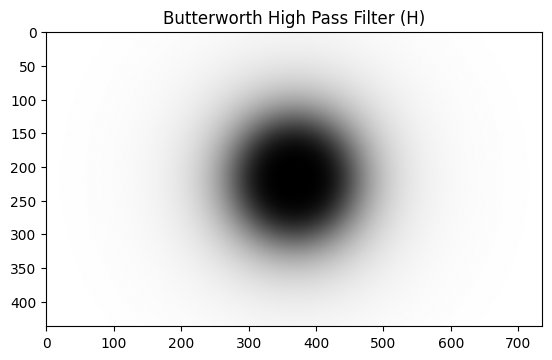

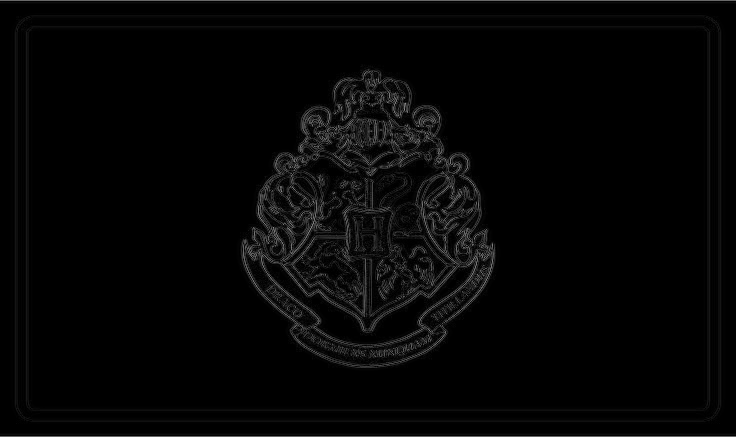

In [ ]:
cutoff = 100
H_butterworth_hpf = butterworth_hpf(image.shape, cutoff, 2)
G_butterworth_hpf = F * H_butterworth_hpf

plt.imshow(H_butterworth_hpf, cmap='gray')
plt.title("Butterworth High Pass Filter (H)")
plt.show()

G_shifted_butterworth_hpf = np.fft.fftshift(G_butterworth_hpf)

g_butterworth_hpf = np.fft.ifft2(G_shifted_butterworth_hpf)

g_butterworth_hpf = np.abs(g_butterworth_hpf)

cv2_imshow(g_butterworth_hpf.astype(np.uint8))

#### Gaussian HPF

In [ ]:
def gaussian_hpf(shape, cutoff_frequency):
    rows, cols = shape
    M, N = rows // 2, cols // 2
    H = np.zeros((rows, cols), np.float64)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - M)**2 + (j - N)**2)
            H[i, j] = 1 - np.exp(-(distance**2) / (2 * (cutoff_frequency**2)))
    return H

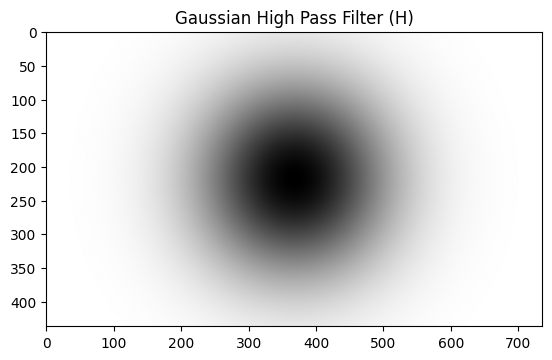

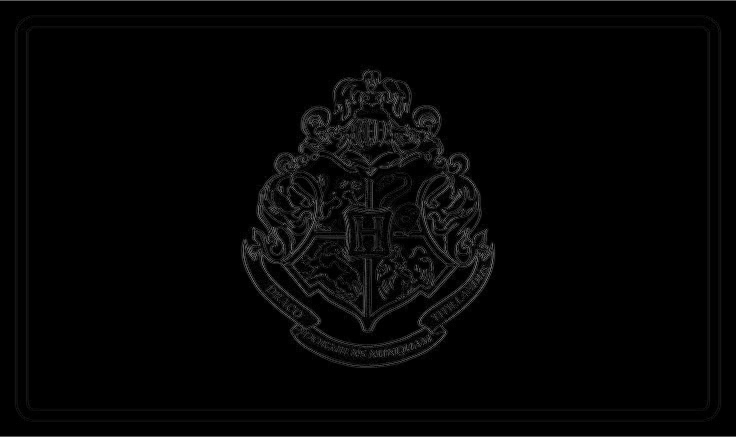

In [ ]:
cutoff = 100
H_gaussian_hpf = gaussian_hpf(image.shape, cutoff)
G_gaussian_hpf = F * H_gaussian_hpf

plt.imshow(H_gaussian_hpf, cmap='gray')
plt.title("Gaussian High Pass Filter (H)")
plt.show()

G_shifted_gaussian_hpf = np.fft.fftshift(G_gaussian_hpf)

g_gaussian_hpf = np.fft.ifft2(G_shifted_gaussian_hpf)

g_gaussian_hpf = np.abs(g_gaussian_hpf)

cv2_imshow(g_gaussian_hpf.astype(np.uint8))